In [1]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('../data/processed/fight_data.csv')

# Create a copy of df to avoid modifying original
df_encoded = df.copy()

# Encode outcome: victory=1, loss=0, draw=0.5 (or you could use victory=1, loss=-1, draw=0)
outcome_mapping = {'victory': 1, 'loss': 0, 'draw': 0.5}
df_encoded['outcome_encoded'] = df_encoded['outcome'].map(outcome_mapping)

print("Outcome distribution:")
print(df['outcome'].value_counts())
print("\nEncoded outcome distribution:")
print(df_encoded['outcome_encoded'].value_counts())

Outcome distribution:
outcome
victory    2849
loss       2027
draw         74
Name: count, dtype: int64

Encoded outcome distribution:
outcome_encoded
1.0    2849
0.0    2027
0.5      74
Name: count, dtype: int64


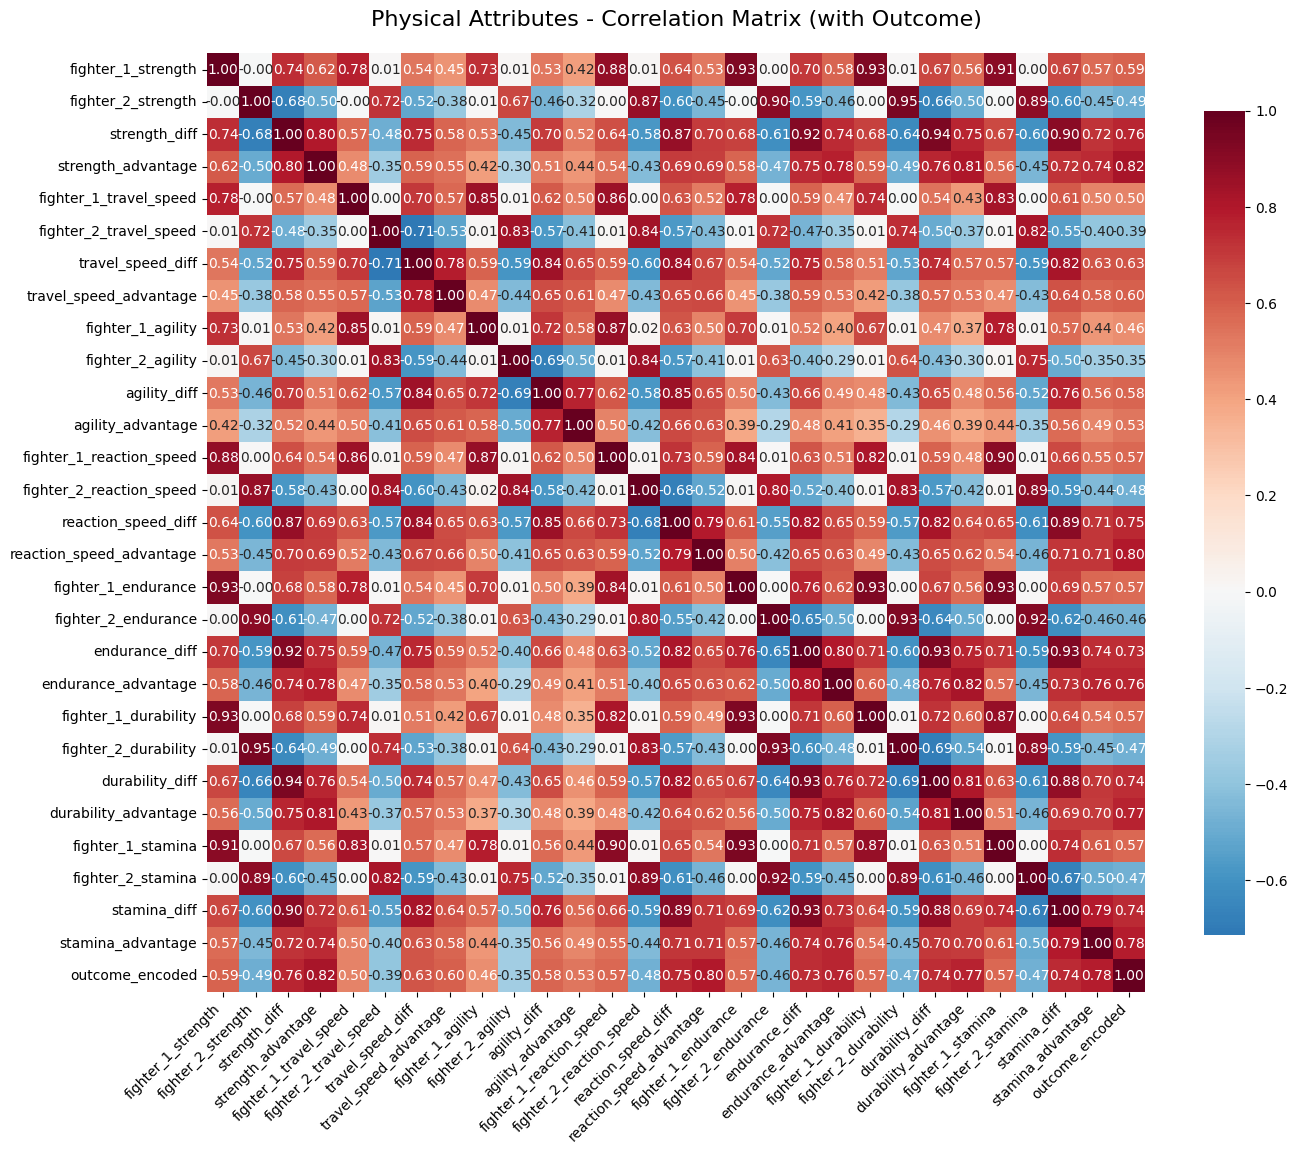


Physical Attributes - Top correlations with outcome:
strength_advantage          0.823405
reaction_speed_advantage    0.798929
stamina_advantage           0.783524
durability_advantage        0.766340
strength_diff               0.763377
endurance_advantage         0.758822
reaction_speed_diff         0.749705
stamina_diff                0.743655
durability_diff             0.737166
endurance_diff              0.732506
Name: outcome_encoded, dtype: float64
------------------------------------------------------------


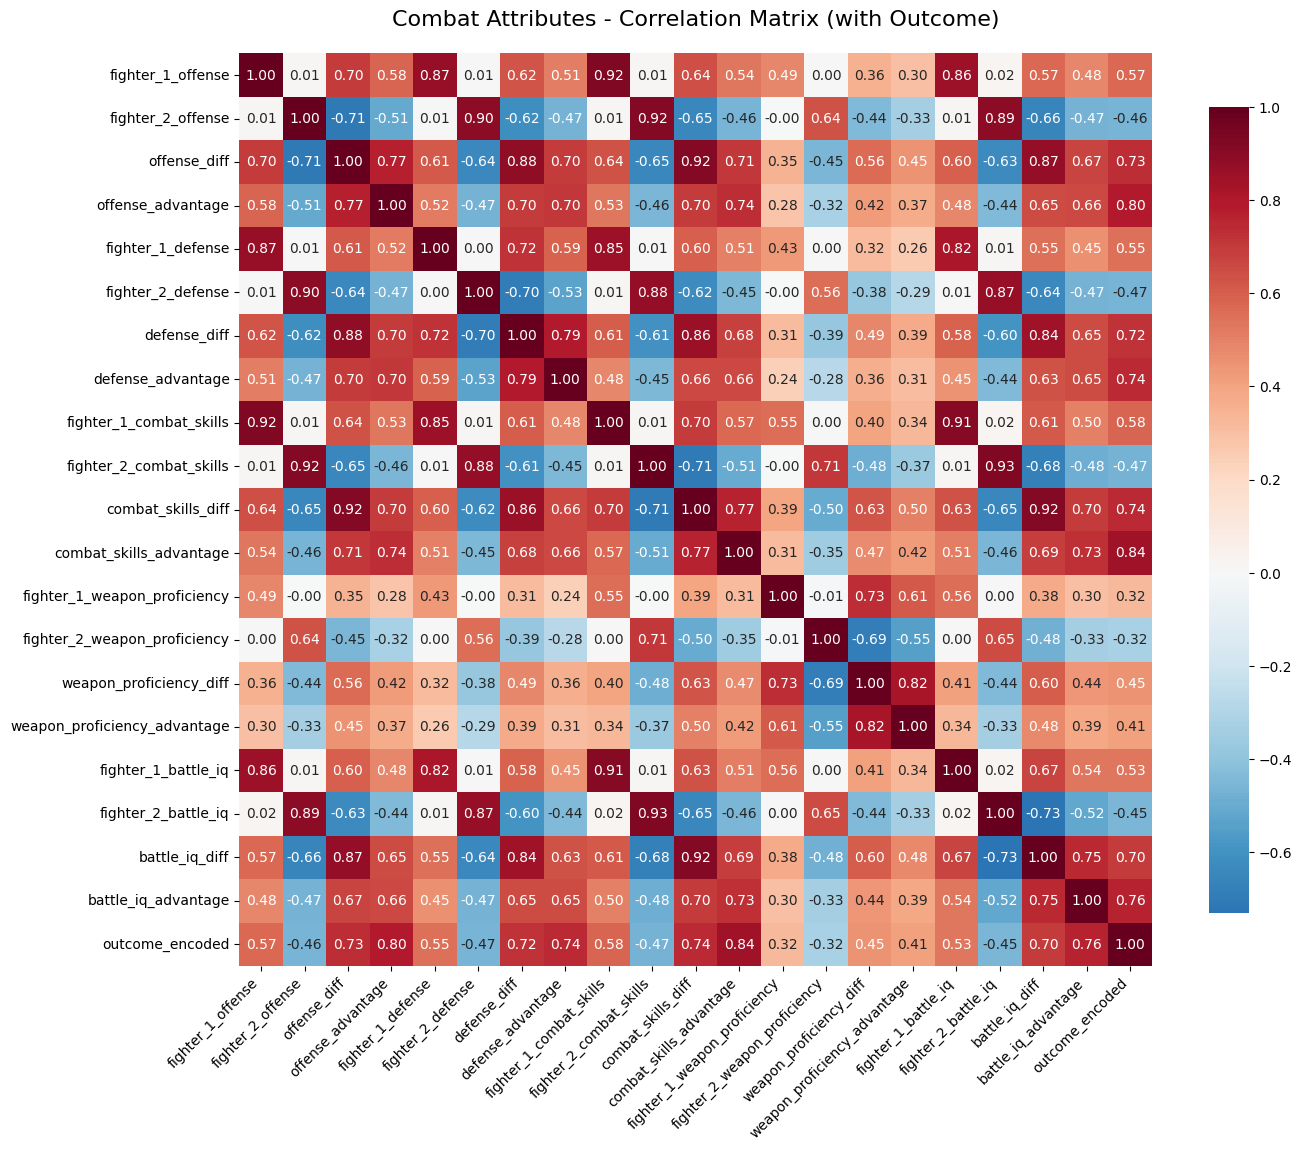


Combat Attributes - Top correlations with outcome:
combat_skills_advantage    0.842037
offense_advantage          0.796222
battle_iq_advantage        0.764931
combat_skills_diff         0.743901
defense_advantage          0.738860
offense_diff               0.733527
defense_diff               0.718411
battle_iq_diff             0.697425
fighter_1_combat_skills    0.577135
fighter_1_offense          0.570724
Name: outcome_encoded, dtype: float64
------------------------------------------------------------


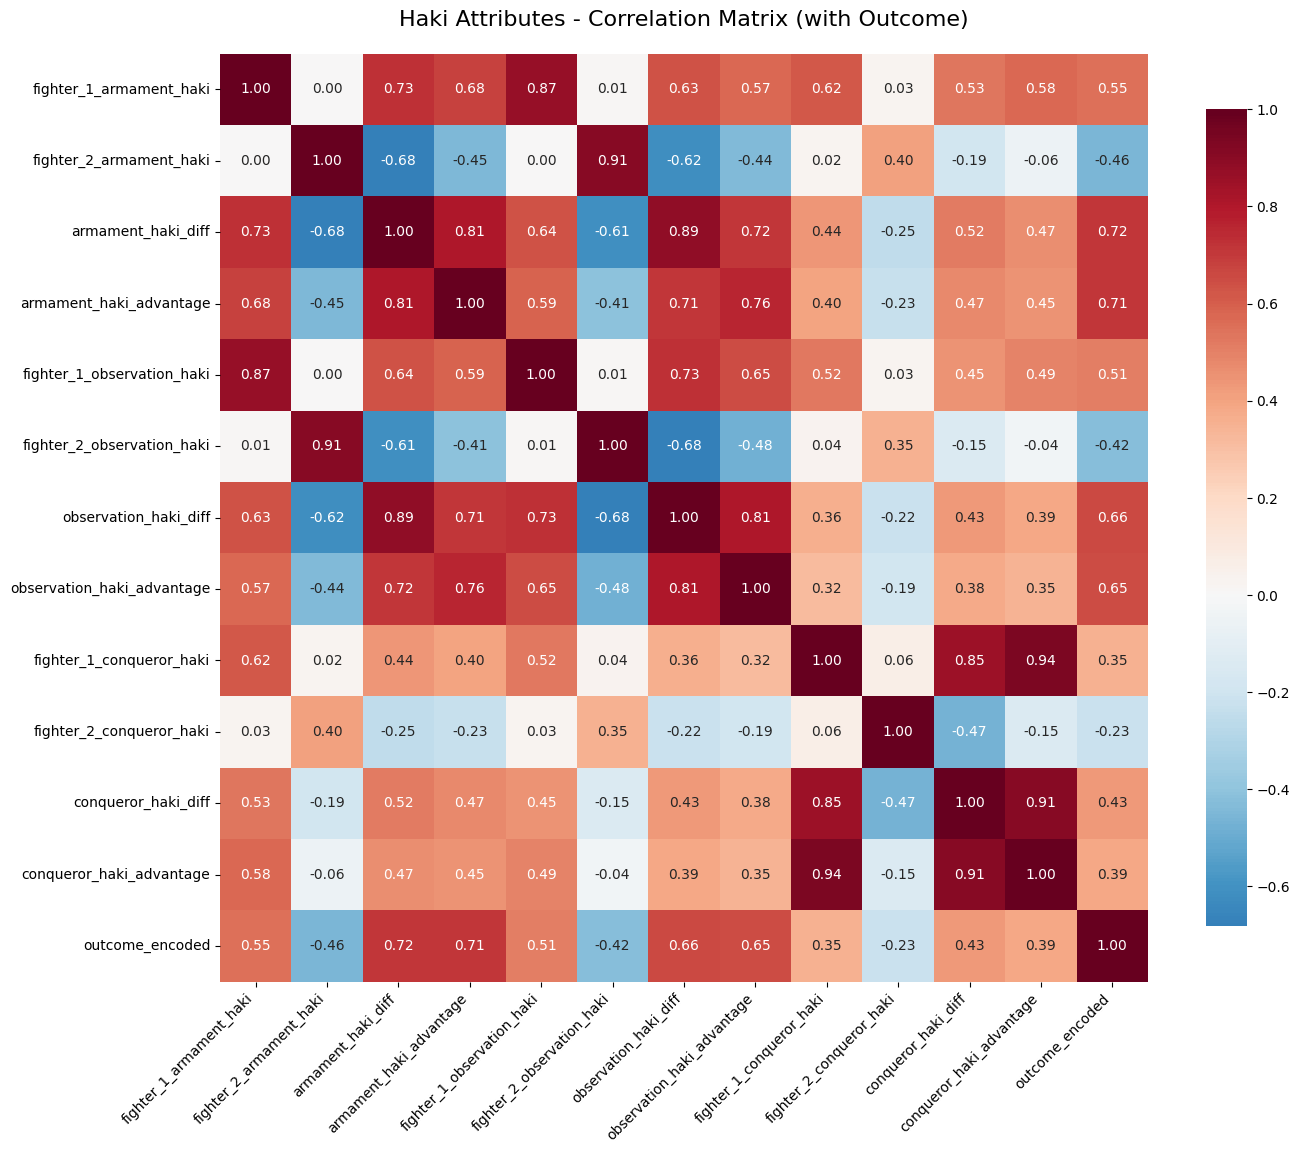


Haki Attributes - Top correlations with outcome:
armament_haki_diff            0.717507
armament_haki_advantage       0.714068
observation_haki_diff         0.662945
observation_haki_advantage    0.647760
fighter_1_armament_haki       0.552757
fighter_1_observation_haki    0.509184
fighter_2_armament_haki      -0.457485
conqueror_haki_diff           0.430657
fighter_2_observation_haki   -0.420377
conqueror_haki_advantage      0.387062
Name: outcome_encoded, dtype: float64
------------------------------------------------------------


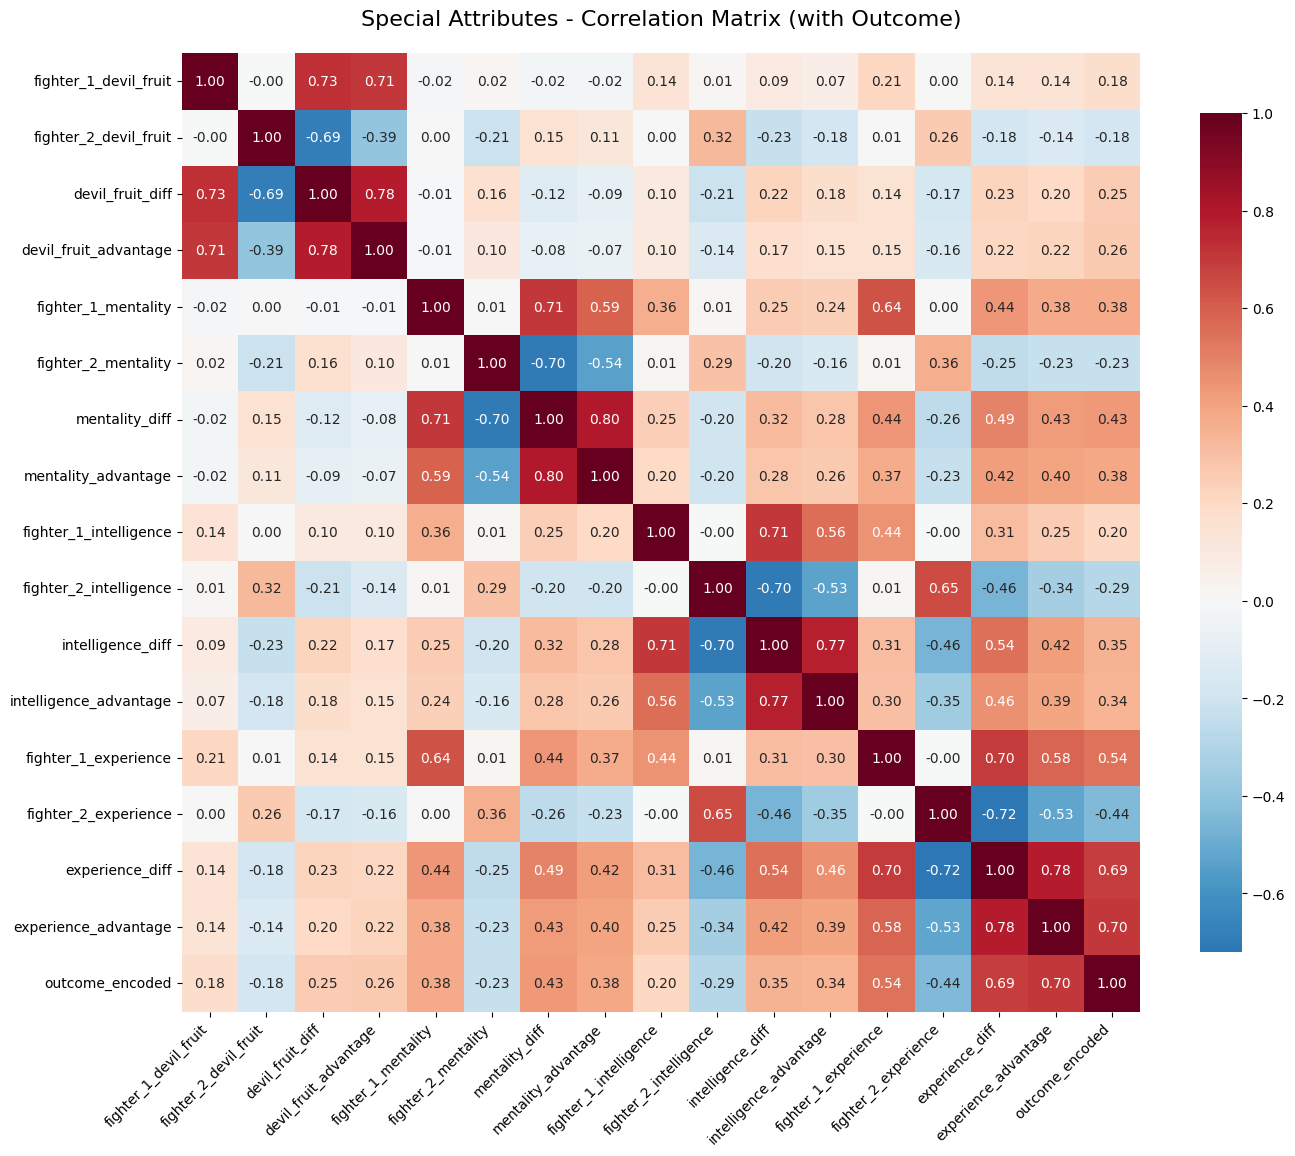


Special Attributes - Top correlations with outcome:
experience_advantage      0.700168
experience_diff           0.687999
fighter_1_experience      0.536769
fighter_2_experience     -0.438480
mentality_diff            0.432643
mentality_advantage       0.384717
fighter_1_mentality       0.379988
intelligence_diff         0.345623
intelligence_advantage    0.336866
fighter_2_intelligence   -0.287185
Name: outcome_encoded, dtype: float64
------------------------------------------------------------


In [3]:
# Define attribute categories
physical_attrs = ['strength', 'travel_speed', 'agility', 'reaction_speed', 'endurance', 'durability', 'stamina']
combat_attrs = ['offense', 'defense', 'combat_skills', 'weapon_proficiency', 'battle_iq']
haki_attrs = ['armament_haki', 'observation_haki', 'conqueror_haki']
special_attrs = ['devil_fruit', 'mentality', 'intelligence', 'experience']

categories = [
    (physical_attrs, 'Physical Attributes'),
    (combat_attrs, 'Combat Attributes'), 
    (haki_attrs, 'Haki Attributes'),
    (special_attrs, 'Special Attributes')
]

# Create separate plots for each category
for attrs, title in categories:
    # Get all columns related to these attributes + outcome
    related_cols = []
    for attr in attrs:
        related_cols.extend([col for col in df_encoded.columns if attr in col and col != 'outcome'])
    
    # Add the encoded outcome
    related_cols.append('outcome_encoded')
    
    if related_cols:
        # Create correlation matrix
        corr_matrix = df_encoded[related_cols].corr()
        
        # Create individual plot
        plt.figure(figsize=(14, 12))
        sns.heatmap(corr_matrix, 
                   annot=True, 
                   cmap='RdBu_r', 
                   center=0,
                   square=True,
                   fmt='.2f',
                   cbar_kws={"shrink": .8})
        
        plt.title(f'{title} - Correlation Matrix (with Outcome)', fontsize=16, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Show correlations with outcome specifically
        outcome_corr = corr_matrix['outcome_encoded'].drop('outcome_encoded').sort_values(key=abs, ascending=False)
        print(f"\n{title} - Top correlations with outcome:")
        print(outcome_corr.head(10))
        print("-" * 60)

## Notes:

### Physical attributes analysis:

Among the 7 physical factors, we see that **strength**, **reaction_speed**, **stamina**, **durability** and **endurance** matter. All the top 10 attributes that have high correlation with the outcome of fight are variables that are _advantage and _diff of the 5 attributes. Moreover, they have great correlation (all above 0.7). It seems agility and travel_speed do not have that much of an impact on the outcome of a fight. However, there might be multicollinearity between reaction_speed, agility and travel_speed. Having watched One Piece for long, I observe that characters that have great reaction_speed tend to have great agility and travel_speed as well. We need to run further analysis to see that whether we can drop travel_speed and agility from the dataset and just count for reaction_speed or not. Another thing to note is that endurance, durability, and stamina may exist a multicollinear relationship, so it's better to check them

### Combat attributes analysis:

Among the 5 combat factors, we see that **combat_skills**, **offense**, **battle_iq** and **defense** matter. **Weapon_proficiency** does not play an important role in the outcome of a fight, which is quite true in One Piece.

### Haki attributes analysis:

At first, it's surprising that **armament** and **observation** haki have greater impact that **conqueror** haki. But, from the perspective of an One Piece fan, it's quite understandable as the number of characters possessing this type of haki are very rare. We may need to perform a separate analysis on characters with conqueror haki to actually understand its impact

### Special attributes analysis:


It's not much of a surprise to see that **experience** triumphs here. Mentality and intelligence does not affect that much the outcome of a fight. In fact, we can assume that every fighter entering a match with great determination, so mentality is the same. And in the tense of battle, battle_iq actually matters much more than traditional intelligence. It's important to note that **battle_iq** is not the same as **intelligence**.

MULTICOLLINEARITY ANALYSIS

 SPEED ATTRIBUTES GROUP: reaction_speed, agility, travel_speed
------------------------------------------------------------


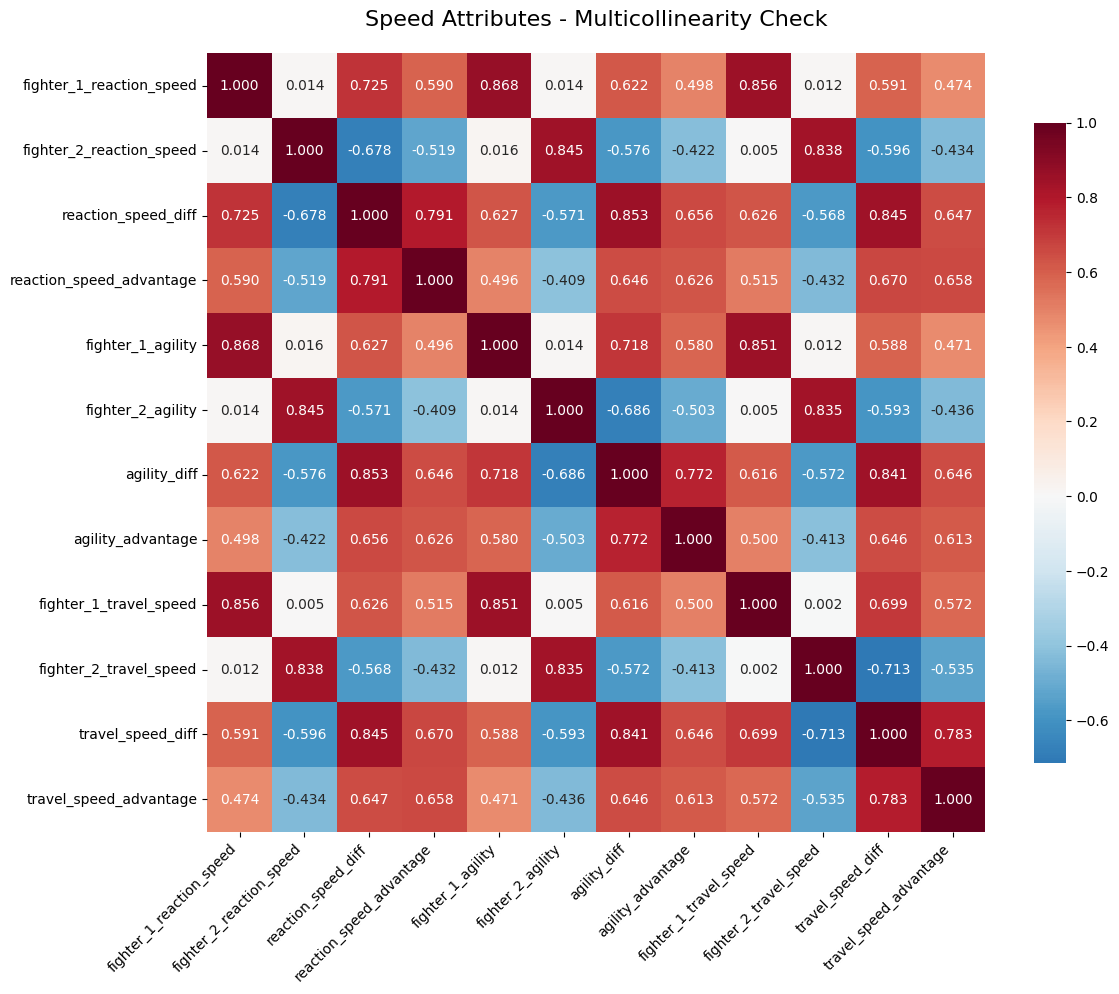


Correlations between speed attributes (Fighter 1):
reaction_speed vs agility: 0.868
reaction_speed vs travel_speed: 0.856
agility vs travel_speed: 0.851


 ENDURANCE ATTRIBUTES GROUP: endurance, durability, stamina
------------------------------------------------------------


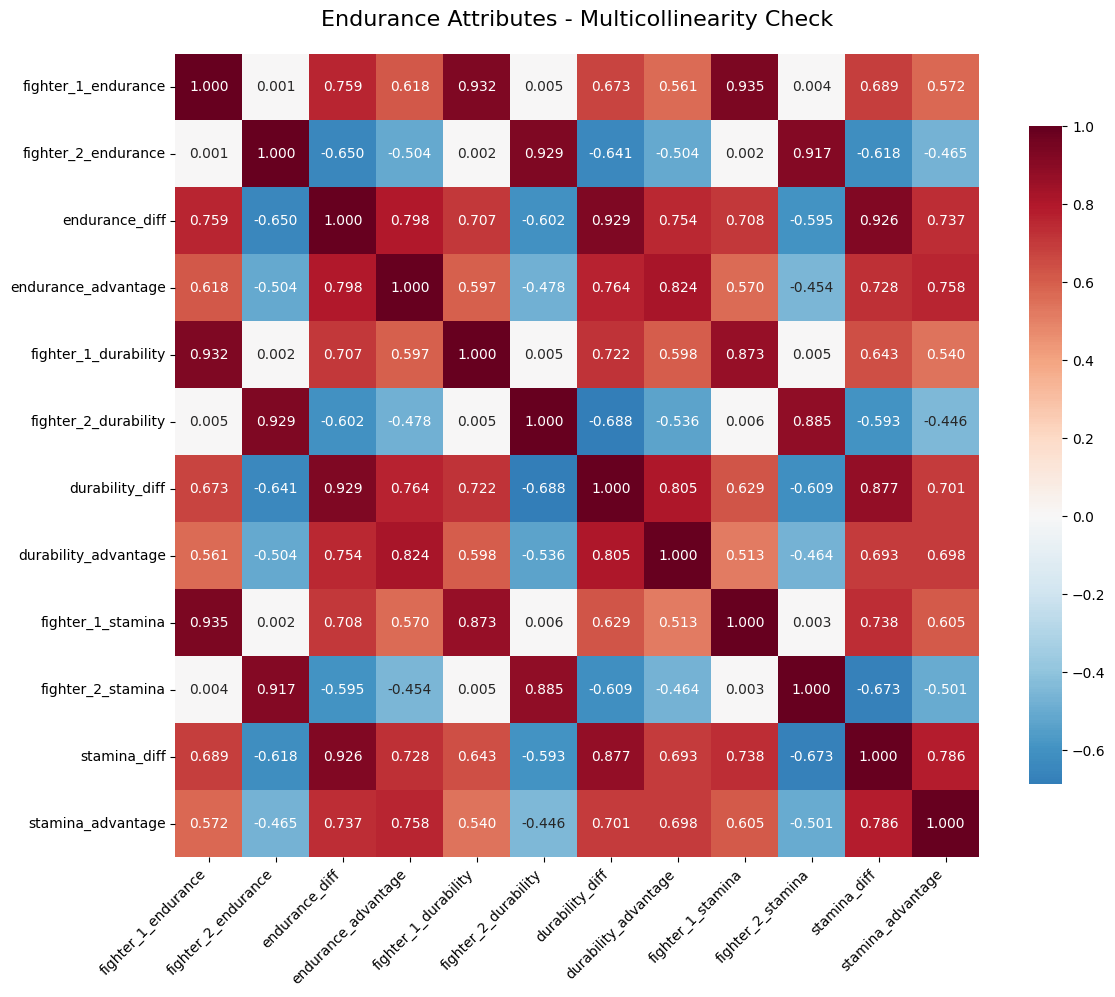


Correlations between endurance attributes (Fighter 1):
endurance vs durability: 0.932
endurance vs stamina: 0.935
durability vs stamina: 0.873

MULTICOLLINEARITY INTERPRETATION:
- Correlations > 0.8: High multicollinearity (consider removing one)
- Correlations 0.5-0.8: Moderate correlation (monitor)
- Correlations < 0.5: Low correlation (generally OK)


In [4]:
# Check multicollinearity for the 2 suspected groups
from scipy.stats import pearsonr

print("="*80)
print("MULTICOLLINEARITY ANALYSIS")
print("="*80)

# Group 1: Speed-related attributes
speed_attrs = ['reaction_speed', 'agility', 'travel_speed']
print("\n SPEED ATTRIBUTES GROUP: reaction_speed, agility, travel_speed")
print("-"*60)

# Get all speed-related columns
speed_cols = []
for attr in speed_attrs:
    speed_cols.extend([col for col in df.columns if attr in col and col != 'outcome'])

# Create correlation matrix for speed attributes
speed_corr = df[speed_cols].corr()

# Display speed correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(speed_corr, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           fmt='.3f',
           cbar_kws={"shrink": .8})
plt.title('Speed Attributes - Multicollinearity Check', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Check specific correlations between the three attributes (using fighter_1 values)
print("\nCorrelations between speed attributes (Fighter 1):")
for i, attr1 in enumerate(speed_attrs):
    for attr2 in speed_attrs[i+1:]:
        col1 = f'fighter_1_{attr1}'
        col2 = f'fighter_1_{attr2}'
        corr_coef = df[col1].corr(df[col2])
        print(f"{attr1} vs {attr2}: {corr_coef:.3f}")

print("\n" + "="*60)

# Group 2: Endurance-related attributes  
endurance_attrs = ['endurance', 'durability', 'stamina']
print("\n ENDURANCE ATTRIBUTES GROUP: endurance, durability, stamina")
print("-"*60)

# Get all endurance-related columns
endurance_cols = []
for attr in endurance_attrs:
    endurance_cols.extend([col for col in df.columns if attr in col and col != 'outcome'])

# Create correlation matrix for endurance attributes
endurance_corr = df[endurance_cols].corr()

# Display endurance correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(endurance_corr, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           fmt='.3f',
           cbar_kws={"shrink": .8})
plt.title('Endurance Attributes - Multicollinearity Check', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Check specific correlations between the three attributes (using fighter_1 values)
print("\nCorrelations between endurance attributes (Fighter 1):")
for i, attr1 in enumerate(endurance_attrs):
    for attr2 in endurance_attrs[i+1:]:
        col1 = f'fighter_1_{attr1}'
        col2 = f'fighter_1_{attr2}'
        corr_coef = df[col1].corr(df[col2])
        print(f"{attr1} vs {attr2}: {corr_coef:.3f}")

print("\n" + "="*80)
print("MULTICOLLINEARITY INTERPRETATION:")
print("- Correlations > 0.8: High multicollinearity (consider removing one)")
print("- Correlations 0.5-0.8: Moderate correlation (monitor)")
print("- Correlations < 0.5: Low correlation (generally OK)")
print("="*80)

In [5]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif(dataframe, features):
    """Calculate VIF for given features"""
    # Remove any rows with missing values
    df_clean = dataframe[features].dropna()
    
    vif_data = []
    for i in range(len(features)):
        vif_value = variance_inflation_factor(df_clean.values, i)
        vif_data.append({'Feature': features[i], 'VIF': vif_value})
    
    return pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print("="*80)
print("VIF ANALYSIS FOR MULTICOLLINEARITY DETECTION")
print("="*80)

# 1. VIF for Fighter 1 speed attributes
print("\n VIF Analysis: Fighter 1 Speed Attributes")
print("-"*50)
speed_f1_cols = ['fighter_1_reaction_speed', 'fighter_1_agility', 'fighter_1_travel_speed']
vif_speed_f1 = calculate_vif(df, speed_f1_cols)
print(vif_speed_f1)

# 2. VIF for Fighter 1 endurance attributes  
print("\n VIF Analysis: Fighter 1 Endurance Attributes")
print("-"*50)
endurance_f1_cols = ['fighter_1_endurance', 'fighter_1_durability', 'fighter_1_stamina']
vif_endurance_f1 = calculate_vif(df, endurance_f1_cols)
print(vif_endurance_f1)

# 3. VIF for Speed difference variables
print("\n VIF Analysis: Speed Difference Variables")
print("-"*50)
speed_diff_cols = ['reaction_speed_diff', 'agility_diff', 'travel_speed_diff']
vif_speed_diff = calculate_vif(df, speed_diff_cols)
print(vif_speed_diff)

# 4. VIF for Endurance difference variables
print("\n VIF Analysis: Endurance Difference Variables")
print("-"*50)
endurance_diff_cols = ['endurance_diff', 'durability_diff', 'stamina_diff']
vif_endurance_diff = calculate_vif(df, endurance_diff_cols)
print(vif_endurance_diff)

# 5. VIF for Speed advantage variables
print("\n VIF Analysis: Speed Advantage Variables")
print("-"*50)
speed_adv_cols = ['reaction_speed_advantage', 'agility_advantage', 'travel_speed_advantage']
vif_speed_adv = calculate_vif(df, speed_adv_cols)
print(vif_speed_adv)

# 6. VIF for Endurance advantage variables
print("\n VIF Analysis: Endurance Advantage Variables")
print("-"*50)
endurance_adv_cols = ['endurance_advantage', 'durability_advantage', 'stamina_advantage']
vif_endurance_adv = calculate_vif(df, endurance_adv_cols)
print(vif_endurance_adv)

print("\n" + "="*80)
print("VIF INTERPRETATION:")
print("- VIF < 5: Low multicollinearity (acceptable)")
print("- VIF 5-10: Moderate multicollinearity (caution)")
print("- VIF > 10: High multicollinearity (consider removing)")
print("="*80)

# Summary recommendation
print("\n RECOMMENDATIONS:")
if any(vif_speed_f1['VIF'] > 10):
    print("  HIGH multicollinearity detected in speed attributes")
    print("   Consider keeping only reaction_speed (highest correlation with outcome)")
else:
    print(" Speed attributes have acceptable multicollinearity")

if any(vif_endurance_f1['VIF'] > 10):
    print("  HIGH multicollinearity detected in endurance attributes")
    print("   Consider creating a composite 'endurance_score' or keeping only the most predictive one")
else:
    print(" Endurance attributes have acceptable multicollinearity")

VIF ANALYSIS FOR MULTICOLLINEARITY DETECTION

 VIF Analysis: Fighter 1 Speed Attributes
--------------------------------------------------
                    Feature        VIF
0  fighter_1_reaction_speed  72.544275
1         fighter_1_agility  69.878545
2    fighter_1_travel_speed  62.382659

 VIF Analysis: Fighter 1 Endurance Attributes
--------------------------------------------------
                Feature         VIF
0   fighter_1_endurance  228.546165
2     fighter_1_stamina  121.476817
1  fighter_1_durability   96.604406

 VIF Analysis: Speed Difference Variables
--------------------------------------------------
               Feature       VIF
0  reaction_speed_diff  4.803368
1         agility_diff  4.692783
2    travel_speed_diff  4.351264

 VIF Analysis: Endurance Difference Variables
--------------------------------------------------
           Feature        VIF
0   endurance_diff  12.219213
1  durability_diff   7.563764
2     stamina_diff   7.272253

 VIF Analysis: Spe

CONQUEROR'S HAKI ANALYSIS

Conqueror's Haki Distribution:
Fighter 1 Conqueror's Haki:
fighter_1_conqueror_haki
0.0    3711
1.0    1239
Name: count, dtype: int64

Fighter 2 Conqueror's Haki:
fighter_2_conqueror_haki
0.0    4605
1.0     345
Name: count, dtype: int64

Total fights: 4950
Fights with at least one Conqueror's Haki user: 1464
Percentage: 29.6%

CONQUEROR'S HAKI FIGHT ANALYSIS


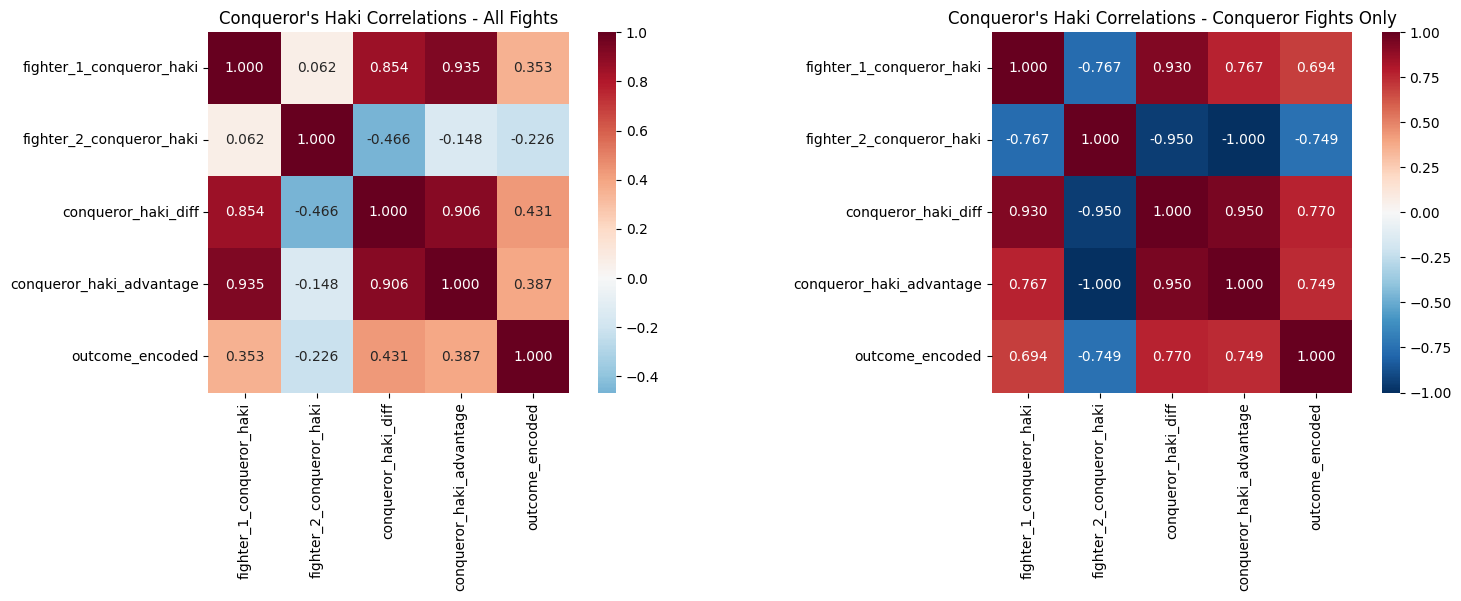


Conqueror's Haki correlation with outcome:
All fights:
conqueror_haki_diff         0.430657
conqueror_haki_advantage    0.387062
fighter_1_conqueror_haki    0.353281
fighter_2_conqueror_haki   -0.225637
Name: outcome_encoded, dtype: float64

Conqueror fights only:
conqueror_haki_diff         0.769785
conqueror_haki_advantage    0.749108
fighter_2_conqueror_haki   -0.749108
fighter_1_conqueror_haki    0.694383
Name: outcome_encoded, dtype: float64

CONQUEROR'S HAKI USERS:
Number of Conqueror's Haki users: 16
Users: ['Boa Hancock', 'Charlotte Katakuri', 'Charlotte Linlin', 'Donquixote Doflamingo', 'Edward Newgate', 'Eustass Kid', 'Gol D. Roger', 'Kaidou', 'Kouzuki Oden', 'Monkey D. Garp', 'Monkey D. Luffy', 'Portgas D. Ace', 'Roronoa Zoro', 'Shanks', 'Silvers Rayleigh', 'Yamato']


In [7]:
print("="*80)
print("CONQUEROR'S HAKI ANALYSIS")
print("="*80)

# First, let's see the distribution of conqueror's haki values
print("\nConqueror's Haki Distribution:")
print("Fighter 1 Conqueror's Haki:")
print(df['fighter_1_conqueror_haki'].value_counts().sort_index())
print("\nFighter 2 Conqueror's Haki:")
print(df['fighter_2_conqueror_haki'].value_counts().sort_index())

# Filter for fights where at least one fighter has conqueror's haki (assuming > 0 means they have it)
# You might need to adjust this condition based on your data
conqueror_fights = df[
    (df['fighter_1_conqueror_haki'] > 0) | 
    (df['fighter_2_conqueror_haki'] > 0)
]

print(f"\nTotal fights: {len(df)}")
print(f"Fights with at least one Conqueror's Haki user: {len(conqueror_fights)}")
print(f"Percentage: {len(conqueror_fights)/len(df)*100:.1f}%")

if len(conqueror_fights) > 0:
    print("\n" + "="*60)
    print("CONQUEROR'S HAKI FIGHT ANALYSIS")
    print("="*60)
    
    # Analyze correlations in conqueror fights
    haki_cols = [col for col in df.columns if 'conqueror_haki' in col and col != 'outcome']
    haki_cols.append('outcome_encoded')
    
    conqueror_corr = df_encoded[haki_cols].corr()
    
    # Plot correlation for conqueror's haki in all fights vs conqueror fights only
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # All fights
    sns.heatmap(df_encoded[haki_cols].corr(), 
               annot=True, cmap='RdBu_r', center=0, ax=axes[0],
               fmt='.3f', square=True)
    axes[0].set_title('Conqueror\'s Haki Correlations - All Fights')
    
    # Conqueror fights only
    conqueror_encoded = conqueror_fights.copy()
    conqueror_encoded['outcome_encoded'] = conqueror_encoded['outcome'].map(outcome_mapping)
    
    sns.heatmap(conqueror_encoded[haki_cols].corr(), 
               annot=True, cmap='RdBu_r', center=0, ax=axes[1],
               fmt='.3f', square=True)
    axes[1].set_title('Conqueror\'s Haki Correlations - Conqueror Fights Only')
    
    plt.tight_layout()
    plt.show()
    
    # Compare outcome correlations
    print("\nConqueror's Haki correlation with outcome:")
    print("All fights:")
    all_conq_corr = df_encoded[haki_cols].corr()['outcome_encoded'].drop('outcome_encoded')
    print(all_conq_corr.sort_values(key=abs, ascending=False))
    
    print("\nConqueror fights only:")
    conq_only_corr = conqueror_encoded[haki_cols].corr()['outcome_encoded'].drop('outcome_encoded')
    print(conq_only_corr.sort_values(key=abs, ascending=False))
    
    # Who are the conqueror's haki users?
    print("\nCONQUEROR'S HAKI USERS:")
    conq_users = set()
    
    # Find all fighters with conqueror's haki > 0
    for _, row in df.iterrows():
        if row['fighter_1_conqueror_haki'] > 0:
            conq_users.add(row['fighter_1_name'])
        if row['fighter_2_conqueror_haki'] > 0:
            conq_users.add(row['fighter_2_name'])
    
    print(f"Number of Conqueror's Haki users: {len(conq_users)}")
    print("Users:", sorted(list(conq_users)))
    
else:
    print("\nNo fights found with Conqueror's Haki users!")
    print("Check your data encoding - maybe Conqueror's Haki is encoded differently?")

## Final notes:

### Feature Selection Summary:
- **Keep only reaction_speed and stamina** from physical attributes (drop travel_speed, agility, durability, endurance due to VIF > 60)
- **Drop weapon_proficiency** from combat attributes (low predictive power)  
- **Keep only experience** from special attributes
- **Keep all haki attributes** - Conqueror's Haki shows 0.77 correlation in relevant fights (16 users identified)

### Key Insight: 
Conqueror's Haki impact was underestimated in initial analysis due to rarity (16/100 characters). When filtered to fights involving Conqueror users, correlation with outcome jumps from 0.43 to 0.77 - making it one of the strongest predictors.

In [9]:
# Load the current fight data
df = pd.read_csv('../data/processed/fight_data.csv')

print(f"Original dataset shape: {df.shape}")
print(f"Original columns: {len(df.columns)}")

# Define columns to KEEP based on EDA findings
columns_to_keep = [
    # Fight identification
    'fight_name',
    
    # Physical attributes (keep only reaction_speed and stamina)
    'fighter_1_reaction_speed', 'fighter_2_reaction_speed', 'reaction_speed_diff', 'reaction_speed_advantage',
    'fighter_1_stamina', 'fighter_2_stamina', 'stamina_diff', 'stamina_advantage',
    'fighter_1_strength', 'fighter_2_strength', 'strength_diff', 'strength_advantage',
    
    # Combat attributes (keep all except weapon_proficiency)
    'fighter_1_offense', 'fighter_2_offense', 'offense_diff', 'offense_advantage',
    'fighter_1_defense', 'fighter_2_defense', 'defense_diff', 'defense_advantage',
    'fighter_1_combat_skills', 'fighter_2_combat_skills', 'combat_skills_diff', 'combat_skills_advantage',
    'fighter_1_battle_iq', 'fighter_2_battle_iq', 'battle_iq_diff', 'battle_iq_advantage',
    
    # Haki attributes (keep all)
    'fighter_1_armament_haki', 'fighter_2_armament_haki', 'armament_haki_diff', 'armament_haki_advantage',
    'fighter_1_observation_haki', 'fighter_2_observation_haki', 'observation_haki_diff', 'observation_haki_advantage',
    'fighter_1_conqueror_haki', 'fighter_2_conqueror_haki', 'conqueror_haki_diff', 'conqueror_haki_advantage',
    
    # Special attributes (keep only experience)
    'fighter_1_experience', 'fighter_2_experience', 'experience_diff', 'experience_advantage',
    
    # Outcome
    'outcome'
]

# Create the cleaned dataset
df_cleaned = df[columns_to_keep].copy()

print(f"\nCleaned dataset shape: {df_cleaned.shape}")
print(f"Cleaned columns: {len(df_cleaned.columns)}")
print(f"Columns removed: {len(df.columns) - len(df_cleaned.columns)}")

# Show what was removed
removed_attributes = ['travel_speed', 'agility', 'durability', 'endurance', 'weapon_proficiency', 'mentality', 'intelligence', 'devil_fruit']

removed_cols = []
for attr in removed_attributes:
    cols = [col for col in df.columns if attr in col]
    removed_cols.extend(cols)

print(f"\nRemoved columns ({len(removed_cols)}):")
for col in sorted(removed_cols):
    print(f"  - {col}")

# Save the cleaned dataset
output_file = '../data/processed/fight_data_cleaned.csv'
df_cleaned.to_csv(output_file, index=False)

print(f"\nCleaned dataset saved to: {output_file}")

# Show final column summary
print(f"\nFINAL DATASET SUMMARY:")
print(f"Physical: reaction_speed, stamina, strength")
print(f"Combat: offense, defense, combat_skills, battle_iq") 
print(f"Haki: armament_haki, observation_haki, conqueror_haki")
print(f"Special: experience")
print(f"Total attributes: 11 (down from 14)")

Original dataset shape: (4950, 82)
Original columns: 82

Cleaned dataset shape: (4950, 46)
Cleaned columns: 46
Columns removed: 36

Removed columns (32):
  - agility_advantage
  - agility_diff
  - devil_fruit_advantage
  - devil_fruit_diff
  - durability_advantage
  - durability_diff
  - endurance_advantage
  - endurance_diff
  - fighter_1_agility
  - fighter_1_devil_fruit
  - fighter_1_durability
  - fighter_1_endurance
  - fighter_1_intelligence
  - fighter_1_mentality
  - fighter_1_travel_speed
  - fighter_1_weapon_proficiency
  - fighter_2_agility
  - fighter_2_devil_fruit
  - fighter_2_durability
  - fighter_2_endurance
  - fighter_2_intelligence
  - fighter_2_mentality
  - fighter_2_travel_speed
  - fighter_2_weapon_proficiency
  - intelligence_advantage
  - intelligence_diff
  - mentality_advantage
  - mentality_diff
  - travel_speed_advantage
  - travel_speed_diff
  - weapon_proficiency_advantage
  - weapon_proficiency_diff

Cleaned dataset saved to: ../data/processed/fight_dat